In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Pymaceuticals Inc.

### Analysis Summary

#### **Treatment Efficacy**

- **Capomulin and Ramicane** appeared to be more effective in reducing the size of the tumors over time compared to **Infubinol and Ceftamin**, as seen in the final tumor volumes presented in the box plots.
- A line plot of tumor volume over time for a single mouse (ID: i509) treated with **Capomulin** demonstrated a fluctuating yet overall decreasing trend in tumor volume, pointing to the treatment's potential effectiveness.

#### **Outlier Analysis**
- During the outlier analysis for the final tumor volumes, only the **Infubinol** regimen had a potential outlier with a tumor volume of approximately **36.32 mm³**. This points to a possible anomaly or exceptional response to the treatment in one mouse.

#### **Correlation and Regression Analysis**
- The scatter plot, correlational analysis, and regression analysis between mouse weight and average tumor volume for the **Capomulin** regimen indicated a strong positive correlation with a correlation coefficient of approximately **0.842**. This suggests that heavier mice tended to have larger tumor volumes.
- The linear regression model (\(y = 0.95x + 21.55\)) provided a statistically significant fit to the data, demonstrating that weight can be a significant predictor of average tumor volume in mice under this treatment.

### **Conclusion**
- **Capomulin and Ramicane** treatments generally resulted in lower final tumor volumes, indicating their higher efficacy compared to **Infubinol and Ceftamin**. However, further analysis involving more variables might be needed to draw a definitive conclusion.
- The presence of a potential outlier in the **Infubinol** group necessitates further investigation to understand the causes behind the anomalous response.
- The strong positive correlation between mouse weight and average tumor volume in the **Capomulin** regimen suggests that weight might influence the effectiveness of the treatment, a factor that could be considered in future studies to optimize treatment strategies. 

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

from scipy.stats import linregress

In [4]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [5]:
# Read the mouse meta data 
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
# Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice.
unique_mice_count = combined_data['Mouse ID'].nunique()
unique_mice_count

249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

# Getting the unique Mouse ID that have duplicate time points
duplicate_mice_IDs = duplicate_mice['Mouse ID'].unique()
duplicate_mice_IDs

array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']

# Displaying the data for the duplicate mouse ID
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'] != 'g989']

# Displaying the clean dataframe
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [57]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_clean = clean_data['Mouse ID'].nunique()
unique_mice_count_clean

248

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Grouping the data by 'Drug Regimen' and calculating the required statistics for 'Tumor Volume (mm3)'
regimen_grouped = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculating the mean, median, variance, standard deviation, and SEM of the tumor volume
mean_tumor_volume = regimen_grouped.mean()
median_tumor_volume = regimen_grouped.median()
variance_tumor_volume = regimen_grouped.var()
std_dev_tumor_volume = regimen_grouped.std()
sem_tumor_volume = regimen_grouped.sem()

# Assembling the resulting series into a single summary DataFrame
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [59]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = regimen_grouped.agg(
    [
        ('mean', 'mean'),
        ('median', 'median'),
        ('var', 'var'),
        ('std', 'std'),
        ('sem', 'sem')
    ]
)

# Renaming the columns for better readability
summary_statistics_agg.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], ['mean', 'median', 'var', 'std', 'sem']])
summary_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

### Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

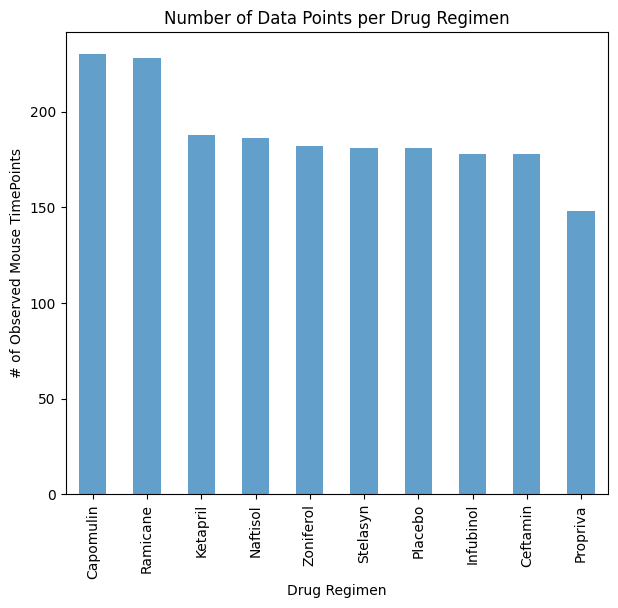

In [60]:
# Getting the total number of rows (Mouse ID/Timepoints) for each drug regimen
rows_count_per_regimen = clean_data['Drug Regimen'].value_counts()

# Generating a bar plot using Pandas
rows_count_per_regimen.plot(kind='bar', alpha=0.7, figsize=(7,6))

# Adding labels and title to the plot
plt.ylabel('# of Observed Mouse TimePoints')
plt.xlabel('Drug Regimen')
plt.title('Number of Data Points per Drug Regimen')

# Displaying the plot
plt.show()

### Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

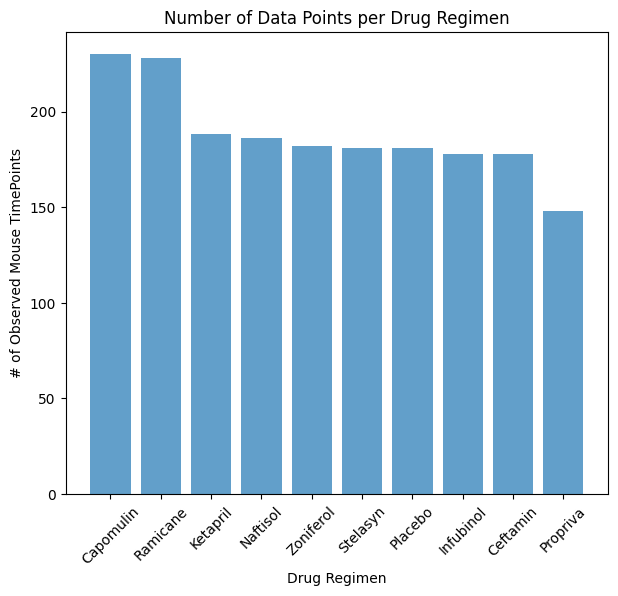

In [61]:
# Getting the unique drug regimens and the number of data points for each
drug_regimens = rows_count_per_regimen.index.tolist()
data_points = rows_count_per_regimen.values.tolist()

# Generating a bar plot using Pyplot
plt.figure(figsize=(7, 6))
plt.bar(drug_regimens, data_points, alpha=0.7)

# Adding labels and title to the plot
plt.ylabel('# of Observed Mouse TimePoints')
plt.xlabel('Drug Regimen')
plt.title('Number of Data Points per Drug Regimen')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

### Generate a pie plot showing the distribution of female versus male mice using Pandas

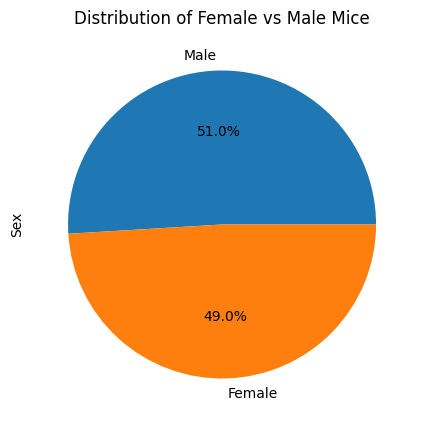

In [62]:
# Getting the distribution of female versus male mice
sex_distribution = clean_data['Sex'].value_counts()

# Generating a pie plot
# Setting a horizontal orientation by setting startangle to 0
plt.figure(figsize=(5, 5))
plt.pie(sex_counts, labels=sex_labels, autopct='%1.1f%%', startangle=0)

# Adding a title to the plot
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')

# Displaying the plot
plt.show()

### Generate a pie plot showing the distribution of female versus male mice using pyplot

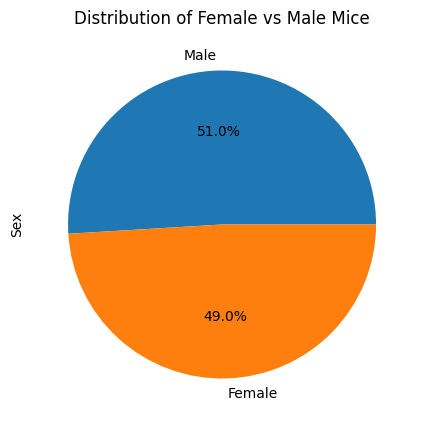

In [63]:
# Getting the unique values for sex and their counts
sex_labels = sex_distribution.index.tolist()
sex_counts = sex_distribution.values.tolist()

# Generating a pie plot
# Setting a horizontal orientation by setting startangle to 0
plt.figure(figsize=(5,5))
plt.pie(sex_counts, labels=sex_labels, autopct='%1.1f%%', startangle=0)

# Adding a title and ylabel to the plot
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')

# Displaying the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens_data = clean_data[clean_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = four_regimens_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [65]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_volume_data.loc[final_tumor_volume_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the tumor volume data list
    tumor_vol_data.append(final_tumor_vol)
    
    # Calculate the IQR
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Find potential outliers
    outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    # Print the IQR and potential outliers
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


### Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

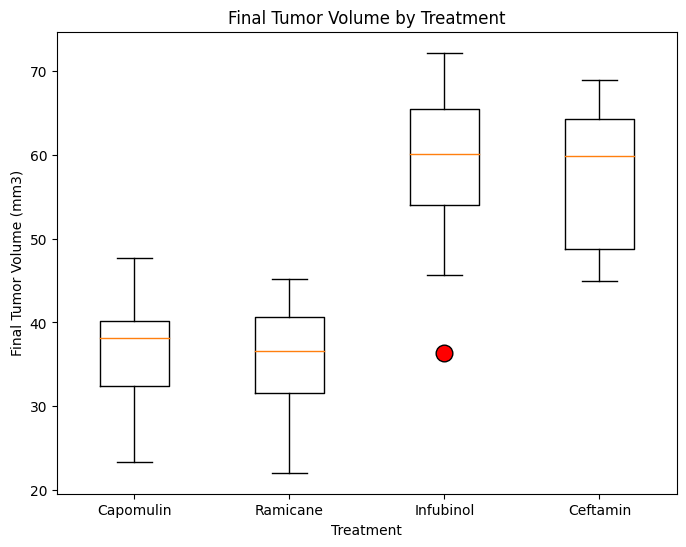

In [66]:
# Resetting the tumor_vol_data list to avoid duplication
tumor_vol_data = []

# Loop through each treatment to find the final tumor volume data, calculate IQR and find potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_volume_data.loc[final_tumor_volume_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the tumor volume data list
    tumor_vol_data.append(final_tumor_vol)
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(8, 6))

# Creating a boxplot for the tumor volume data of each treatment
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(markerfacecolor='red', markersize=12))

# Adding titles and labels to the plot
plt.title('Final Tumor Volume by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')

# Displaying the plot
plt.show()

## Line and Scatter Plots

### Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

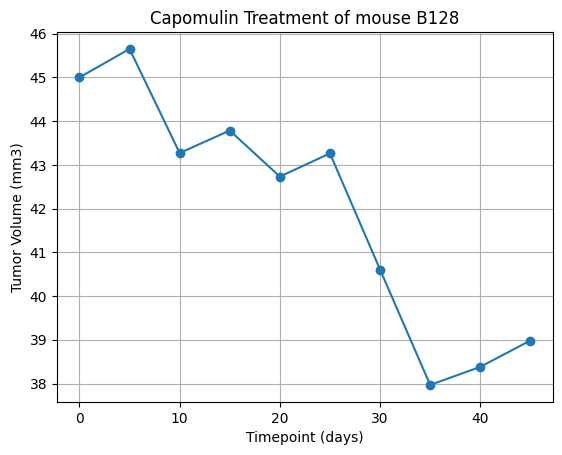

In [68]:
# Selecting a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Selecting the first mouse ID for Capomulin treatment
mouse_id = capomulin_data['Mouse ID'].unique()[0]

# Getting data for the selected mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generating a line plot of tumor volume vs. time point for the selected mouse
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Adding titles and labels to the plot
plt.title(f'Capomulin Treatment of mouse {mouse_id.upper()}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Displaying the plot
plt.grid(True)
plt.show()

### Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

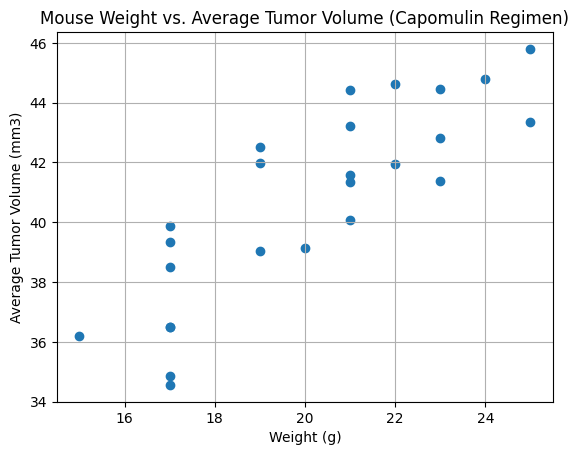

In [69]:
# Grouping the data by Mouse ID to get the average tumor volume and weight for each mouse in the Capomulin regimen
capomulin_avg_data = capomulin_data.groupby('Mouse ID').agg(
    avg_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    weight=('Weight (g)', 'mean')
)

# Generating a scatter plot of mouse weight vs. average tumor volume for the Capomulin regimen
plt.scatter(capomulin_avg_data['weight'], capomulin_avg_data['avg_tumor_volume'], marker='o')

# Adding titles and labels to the plot
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Displaying the plot
plt.grid(True)
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


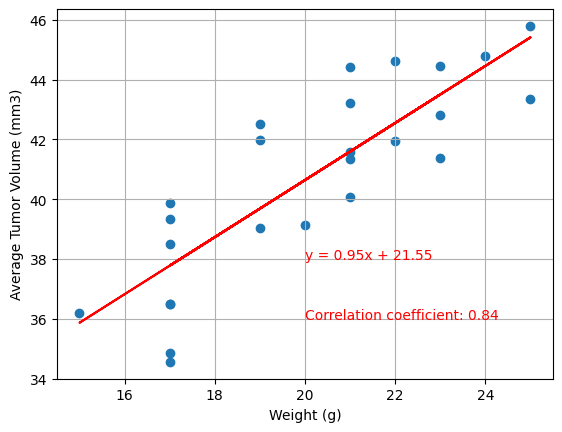

In [74]:
# Calculate the correlation coefficient
correlation_coefficient = capomulin_avg_data['weight'].corr(capomulin_avg_data['avg_tumor_volume'])

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_avg_data['weight'], capomulin_avg_data['avg_tumor_volume'])
regress_values = capomulin_avg_data['weight'] * slope + intercept

# Generating a scatter plot of mouse weight vs. average tumor volume for the Capomulin regimen
plt.scatter(capomulin_avg_data['weight'], capomulin_avg_data['avg_tumor_volume'], marker='o')

# Plotting the linear regression line
plt.plot(capomulin_avg_data['weight'], regress_values, color='red')

# Adding labels to the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Displaying the correlation coefficient and the equation of the line
plt.annotate(f'Correlation coefficient: {correlation_coefficient:.2f}', (20, 36), fontsize=10, color='red')
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (20, 38), fontsize=10, color='red')

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Displaying the plot
plt.grid(True)
plt.show()